In [5]:
import LCCall as LCC
import LCAnalyses as LCA
import LCPlot as LCP
import importlib
import matplotlib.pyplot as plt
import numpy as np
import scipy.constants as cons
import julian
importlib.reload(LCC)
importlib.reload(LCA)
importlib.reload(LCP)

<module 'LCPlot' from '/media/lyhee/Secdrive/TSmain/Pip_test/trigger_codes_github/LCPlot.py'>

In [6]:
k = "EC53"
mod_date = "191021"
dates_K, mags_K, noises_K = LCC.EC53IR("UKIRT_K",imeunit="day",addLiverpool=0,timeunit="day")
dates_IK, mags_IK, noises_IK = LCC.EC53IR("IRIS_Ks",imeunit="day",addLiverpool=0,timeunit="day")
dates_H, mags_H, noises_H = LCC.EC53IR("UKIRT_H",imeunit="day",addLiverpool=0,timeunit="day")
dates_IH, mags_IH, noises_IH = LCC.EC53IR("IRIS_Hn",imeunit="day",addLiverpool=0,timeunit="day")
dates_J, mags_J, noises_J = LCC.EC53IR("UKIRT_J",imeunit="day",addLiverpool=0,timeunit="day")
dates_IJ, mags_IJ, noises_IJ = LCC.EC53IR("IRIS_Jn",imeunit="day",addLiverpool=0,timeunit="day")
dates_LH, mags_LH, noises_LH = LCC.EC53IR("Liverpool_H",imeunit="day",timeunit="day")
dates_850, fluxes_850, noises_850 = LCC.JCMTTRansientSource(k,"SERPM","850",mod_date)
dates_450, fluxes_450, noises_450 = LCC.JCMTTRansientSource(k,"SERPM","450",mod_date)
JDs_W1, mags_W1, noises_W1 = LCC.EC53IR("WISE_W1_avg")
JDs_W2, mags_W2, noises_W2 = LCC.EC53IR("WISE_W2_avg")
JDs_W3, mags_W3, noises_W3 = LCC.EC53IR("WISE_W3_avg")
JDs_W4, mags_W4, noises_W4 = LCC.EC53IR("WISE_W4_avg")
dates_HK, mags_HK, noises_HK = LCC.EC53IR("Hodapp_K")

ValueError: Object arrays cannot be loaded when allow_pickle=False

In [2]:
JDs_K = [x-2400000.5 for x in dates_K]
JDs_IK = [x-2400000.5 for x in dates_IK]
JDs_H = [x-2400000.5 for x in dates_H]
JDs_IH = [x-2400000.5 for x in dates_IH]
JDs_LH = [x-2400000.5 for x in dates_LH]
JDs_J = [x-2400000.5 for x in dates_J]
JDs_IJ = [x-2400000.5 for x in dates_IJ]
JDs_850 = [x-2400000.5 for x in dates_850]
JDs_450 = [x-2400000.5 for x in dates_450]
JDs_HK = [x-2400000.5 for x in dates_HK]
mags_850,mnoises_850 = LCC.Mag2flux("850",fluxes_850,noises_850, reverse=1)
mags_450,mnoises_450 = LCC.Mag2flux("450",fluxes_450,noises_450, reverse=1)

NameError: name 'dates_K' is not defined

In [22]:
importlib.reload(LCC)
fluxes_K,fnoises_K = LCC.Mag2flux("UKIRT_K",mags_K,noises_K,unit='Jy')
#fluxes_HK, fnoise_HK = LCC.Mag2flux("Hodapp_K",mags_HK,noises_HK)
fluxes_H,fnoises_H = LCC.Mag2flux("UKIRT_H",mags_H,noises_H,unit='Jy')
fluxes_LH,fnoises_LH = LCC.Mag2flux("Liverpool_H",mags_LH,noises_LH,unit='Jy')
fluxes_J,fnoises_J = LCC.Mag2flux("UKIRT_J",mags_J,noises_J,unit='Jy')
fluxes_W1,fnoises_W1 = LCC.Mag2flux("WISE_W1",mags_W1,noises_W1,unit='Jy')
fluxes_W2,fnoises_W2 = LCC.Mag2flux("WISE_W2",mags_W2,noises_W2,unit='Jy')
fluxes_W3,fnoises_W3 = LCC.Mag2flux("WISE_W3",mags_W3,noises_W3,unit='Jy')
fluxes_W4,fnoises_W4 = LCC.Mag2flux("WISE_W4",mags_W4,noises_W4,unit='Jy')

LCC.JD2date(57508.494810)
# 160430  161010
UTs_J = [LCC.JD2date(x) for x in JDs_J]
UTs_H = [LCC.JD2date(x) for x in JDs_H]
UTs_K = [LCC.JD2date(x) for x in JDs_K]
#J 2 H 2 K 2
print(np.where(np.array(UTs_J) == '20160430'),
      np.where(np.array(UTs_H) == '20160430'),
      np.where(np.array(UTs_K) == '20160430'))
print(np.where(np.array(UTs_J) == '20161010'),
      np.where(np.array(UTs_H) == '20161010'),
      np.where(np.array(UTs_K) == '20161010'))
print(fnoises_J[73]*1000, fnoises_H[71]*1000, fnoises_K[71]*1000)
print(fnoises_J[113]*1000, fnoises_H[112]*1000, fnoises_K[113]*1000)
#print(UTs_K)
#JDs_H[73]
#print(fluxes_J[73],fnoises_J[73])

'/mnt/Secdrive/TSmain/SERPM/Results_191021/EC53/SERPM_EC53_LC_ALL_bands.pdf'

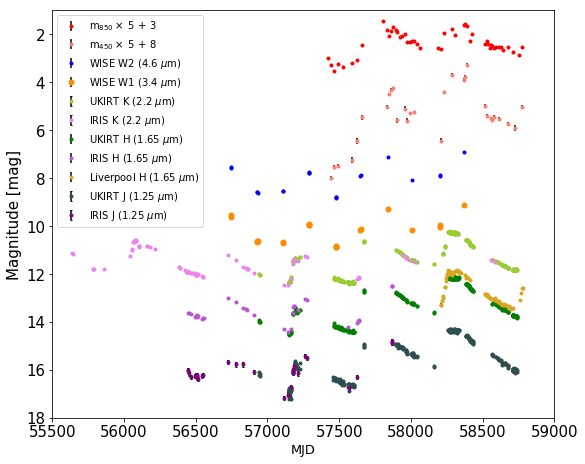

In [23]:
alpha=1
plt.close()
plt.figure(figsize=[9,7.5])
region = "SERPM"
#LCP.LCplot(JDs_850, [x*5+12 for x in mags_850],noises_850,mod_date,region,k,wl='ALL_bands',mag=1,save=0,
#           newplot=0, color='red',ecolor = 'black',stringcolor='green',figureindex=1,
#           markersize =3,capsize=0,alpha = alpha,label = "850 $\mu$m * 5")
LCP.LCplot(JDs_850, [x*5+3 for x in mags_850],mnoises_850,mod_date,region,k,wl='ALL_bands',mag=1,save=0,
           newplot=0, color='red',ecolor = 'black',stringcolor='green',figureindex=1,
           markersize =3,capsize=0,alpha = alpha,label = r"m$_{850} \times$ 5 + 3")
LCP.LCplot(JDs_450, [x*5+8 for x in mags_450],mnoises_450,"191015",region,k,wl='ALL_bands',mag=1,save=0,
           newplot=0, color='salmon',ecolor = 'black',stringcolor='green',figureindex=1,
           markersize =3,capsize=0,alpha = alpha,label = r"m$_{450} \times$ 5 + 8")
#*5 + 12

#LCP.LCplot(JDs_W4, [x for x in mags_W4],noises_W4,mod_date,region,k,wl='ALL_bands',mag=1,save=0,
#           newplot=0, color='brown',ecolor = 'black',stringcolor='green',figureindex=1,
#           markersize =3,capsize=1,alpha = alpha)
#LCP.LCplot(JDs_W3, [x for x in mags_W3],noises_W3,mod_date,region,k,wl='ALL_bands',mag=1,save=0,
#           newplot=0, color='orangered',ecolor = 'black',stringcolor='green',figureindex=1,
#           markersize =3,capsize=1,alpha = alpha)
LCP.LCplot(JDs_W2, [x for x in mags_W2],noises_W2,mod_date,region,k,wl='ALL_bands',mag=1,save=0,
           newplot=0, color='blue',ecolor = 'black',stringcolor='blue',figureindex=1,
           markersize =3,capsize=0,alpha = alpha,label = "WISE W2 (4.6 $\mu$m)")
# +3.6

LCP.LCplot(JDs_W1, [x for x in mags_W1],noises_W1,mod_date,region,k,wl='ALL_bands',mag=1,save=0,
           newplot=0, color='darkorange',ecolor = 'black',stringcolor='darkorange',figureindex=1,
           markersize =5,capsize=0,alpha = alpha,label = "WISE W1 (3.4 $\mu$m)")
# +1.5

LCP.LCplot(JDs_K, [x for x in mags_K],noises_K,mod_date,region,k,wl='ALL_bands',mag=1,save=0,
           newplot=0, color='yellowgreen',ecolor = 'black',stringcolor='yellowgreen',figureindex=1,
           markersize =3,capsize=1,alpha = alpha,label = "UKIRT K (2.2 $\mu$m)",string=0)

LCP.LCplot(JDs_IK, [x for x in mags_IK],noises_IK,mod_date,region,k,wl='ALL_bands',mag=1,save=0,
           newplot=0, color='violet',ecolor = 'black',stringcolor='yellowgreen',figureindex=1,
           markersize =3,capsize=1,alpha = alpha,label = "IRIS K (2.2 $\mu$m)",string=0)

LCP.LCplot(JDs_H, [x for x in mags_H],noises_H,mod_date,region,k,wl='ALL_bands',mag=1,save=0,
           newplot=0, color='green',ecolor = 'black',stringcolor='green',figureindex=1,
           markersize =3,capsize=0,alpha = alpha,label = "UKIRT H (1.65 $\mu$m)",string=0)

LCP.LCplot(JDs_IH, [x for x in mags_IH],noises_IH,mod_date,region,k,wl='ALL_bands',mag=1,save=0,
           newplot=0, color='mediumorchid',ecolor = 'black',stringcolor='green',figureindex=1,
           markersize =3,capsize=0,alpha = alpha,label = "IRIS H (1.65 $\mu$m)",string=0)

LCP.LCplot(JDs_LH, [x for x in mags_LH],noises_LH,mod_date,region,k,wl='ALL_bands',mag=1,save=0,
           newplot=0, color='goldenrod',ecolor = 'black',stringcolor='goldenrod',figureindex=1,
           markersize =3,capsize=0,alpha = alpha,label = "Liverpool H (1.65 $\mu$m)",string=0)

LCP.LCplot(JDs_J, [x for x in mags_J],noises_J,mod_date,region,k,wl='ALL_bands',mag=0,save=0,
           newplot=0, color='darkslategray',ecolor = 'black',stringcolor='darkslategray',figureindex=1,
           markersize =3,capsize=1,alpha = alpha,label="UKIRT J (1.25 $\mu$m)",string=0,legend=1)

#-1.7



#-4
i1 = 7 
i2 = 12
i3 = 14
i4 = 15
i5 = 19
CustomFunction = [JDs_W1[i1],JDs_W1[i2],JDs_W1[i3],JDs_W1[i4],JDs_W1[i5]]

plt.xlim([55500,59000])
plt.ylim([1,18])
#plt.ylim([10,14])
#plt.plot([55000+2508,55000+2508],[0,20],color = "black",alpha =0.3)
#plt.plot([55000+3051,55000+3051],[0,20],color = "black", alpha = 0.3)
#plt.plot([CustomFunction[0],CustomFunction[0]],[0,500],color = "red",alpha =1.0)
#plt.plot([CustomFunction[1],CustomFunction[1]],[0,500],linestyle='dashed',color = "blue", alpha = 0.3)
#plt.plot([CustomFunction[2],CustomFunction[2]],[0,500],linestyle='dashed',color = "blue", alpha = 0.5)
#plt.plot([CustomFunction[3],CustomFunction[3]],[0,500],color = "blue", alpha = 1.0)
#plt.plot([CustomFunction[4],CustomFunction[4]],[0,500],color = "green", alpha = 1.0)
plt.tick_params(axis='x',labelsize=15)
plt.tick_params(axis='y',labelsize=15)
#plt.gca().invert_yaxis()
LCP.LCplot(JDs_IJ, [x for x in mags_IJ],noises_IJ,mod_date,region,k,wl='ALL_bands',mag=1,save=1,
           newplot=0, color='purple',ecolor = 'black',stringcolor='darkslategray',figureindex=1,
           markersize =3,capsize=1,alpha = alpha,label="IRIS J (1.25 $\mu$m)",string=0,legend=1)
#LCP.LCplot(JDs_HK, [x for x in mags_HK],noises_HK,mod_date,region,k,wl='IR_bands',mag=1,save=0,
           #newplot=0,color='grey',ecolor = 'grey',stringcolor='green',figureindex=1,
           #markersize =3,capsize=1,alpha = 0.5,label = "Hodapp K",legend = 1,option="_noepochs")
#plt.xlim([58000,58800])
#i = 19
#plt.plot([JDs_W1[i],JDs_W1[i]],[10,14])
#print(LCC.JD2date(JDs_W1[i]))
#print(mags_W1[i])

In [18]:
print(LCC.JD2date(2457508,fmt='jd'))
print(LCC.JD2date(2458051,fmt="jd"))

20160429
20171024


In [300]:
print(JDs_W1[12],JDs_W1[14],JDs_W1[15])

57478.79924 57649.25325 57841.46553


'/mnt/Secdrive/TSmain/SERPM/Results_190709/EC53/SERPM_EC53_LC_ALL_bands_flux_060.pdf'

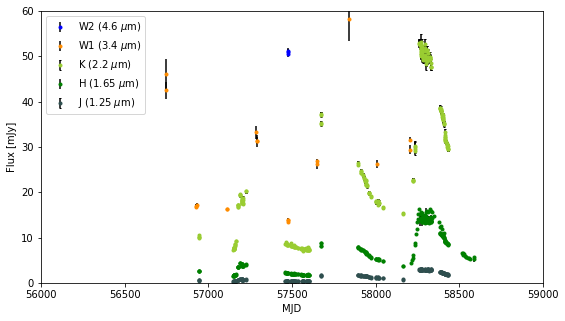

In [441]:
importlib.reload(LCP)
alpha=1
plt.close()
plt.figure(figsize=[9,5])
region = "SERPM"
#LCP.LCplot(JDs_850, [x*1000 for x in fluxes_850],np.zeros(len(JDs_850)),mod_date,region,k,wl='ALL_bands',mag=0,save=0,
#           newplot=0, color='red',ecolor = 'black',stringcolor='green',figureindex=1,
#           markersize =3,capsize=0,alpha = alpha,label = "850 $\mu$m")
#LCP.LCplot(JDs_W4, [x for x in mags_W4],noises_W4,mod_date,region,k,wl='ALL_bands',mag=0,save=0,
#           newplot=0, color='brown',ecolor = 'black',stringcolor='green',figureindex=1,
#           markersize =3,capsize=1,alpha = alpha)
#LCP.LCplot(JDs_W3, [x for x in mags_W3],noises_W3,mod_date,region,k,wl='ALL_bands',mag=0,save=0,
#           newplot=0, color='orangered',ecolor = 'black',stringcolor='green',figureindex=1,
#           markersize =3,capsize=1,alpha = alpha)
LCP.LCplot(JDs_W2, [x for x in fluxes_W2],fnoises_W2,mod_date,region,k,wl='ALL_bands',mag=0,save=0,
           newplot=0, color='blue',ecolor = 'black',stringcolor='green',figureindex=1,
           markersize =3,capsize=0,alpha = alpha,label = "W2 (4.6 $\mu$m)")
LCP.LCplot(JDs_W1, [x for x in fluxes_W1],fnoises_W1,mod_date,region,k,wl='ALL_bands',mag=0,save=0,
           newplot=0, color='darkorange',ecolor = 'black',stringcolor='green',figureindex=1,
           markersize =3,capsize=0,alpha = alpha,label = "W1 (3.4 $\mu$m)")
LCP.LCplot(JDs_K, [x for x in fluxes_K],fnoises_K,mod_date,region,k,wl='ALL_bands',mag=0,save=0,
           newplot=0, color='yellowgreen',ecolor = 'black',stringcolor='green',figureindex=1,
           markersize =3,capsize=1,alpha = alpha,label = "K (2.2 $\mu$m)")
LCP.LCplot(JDs_H, [x for x in fluxes_H],fnoises_H,mod_date,region,k,wl='ALL_bands',mag=0,save=0,
           newplot=0, color='green',ecolor = 'black',stringcolor='green',figureindex=1,
           markersize =3,capsize=0,alpha = alpha,label = "H (1.65 $\mu$m)")


plt.xlim([56000,59000])
plt.ylim([0,30])
#plt.plot([55000+2508,55000+2508],[0,2],color = "black",alpha =0.3)
#plt.plot([55000+3051,55000+3051],[0,2],color = "black", alpha = 0.3)
LCP.LCplot(JDs_J, [x for x in fluxes_J],fnoises_J,mod_date,region,k,wl='ALL_bands',mag=0,save=0,
           newplot=0, color='darkslategray',ecolor = 'black',stringcolor='green',figureindex=1,
           markersize =3,capsize=1,alpha = alpha,label = "J (1.25 $\mu$m)",legend=1,option="_flux_0300")

#LCP.LCplot(JDs_HK, [x for x in fluxes_HK],fnoises_HK,mod_date,region,k,wl='IR_bands',mag=1,save=1,
#           newplot=0, color='grey',ecolor = 'grey',stringcolor='green',figureindex=1,
#           markersize =3,capsize=1,alpha = 0.5,label = "Hodapp_K",option="_flux",legend = 1)

In [11]:
5*(1/2.5)*np.log(10)*0.7

3.223619130191664

In [15]:
#SED plot##################################
#1phase : 12, 14, 15
#bursts : 7, 15, 19
i1 = 7 
i2 = 12
i3 = 14
i4 = 15
i5 = 19

CustomFunction = [JDs_W1[i1],JDs_W1[i2],JDs_W1[i3],JDs_W1[i4],JDs_W1[i5]]

Customdates = []
print(CustomFunction)
importlib.reload(LCA)
r_func, SED_fluxes_J, SED_noises_J =LCA.LCSEDflux(JDs_J,fluxes_J,fnoises_J,CustomFunction,'UKIRT_J')
r_func, SED_fluxes_H, SED_noises_H =LCA.LCSEDflux(JDs_H,fluxes_H,fnoises_H,CustomFunction,'UKIRT_H')
r_func, SED_fluxes_K, SED_noises_K =LCA.LCSEDflux(JDs_K,fluxes_K,fnoises_K,CustomFunction,'UKIRT_K')
#r_func, SED_fluxes_W1, SED_noises_W1 =LCA.LCSEDflux(JDs_W1,fluxes_W1,fnoises_W1,CustomFunction,'WISE_W1')
#r_func, SED_fluxes_W2, SED_noises_W2 =LCA.LCSEDflux(JDs_W2,fluxes_W2,fnoises_W2,CustomFunction,'WISE_W2')
#r_func, SED_fluxes_850, SED_noises_850 =LCA.LCSEDflux(JDs_850,fluxes_850,noises_850,'')

[57286.53486, 57478.79924, 57649.25325, 57841.46553, 58369.80855]


In [450]:
SED_fluxes_H

[660251165170.5717,
 384602732558.57043,
 1121924645861.1584,
 1473970898255.7964,
 2511966781883.2134]

NameError: name 'ax' is not defined

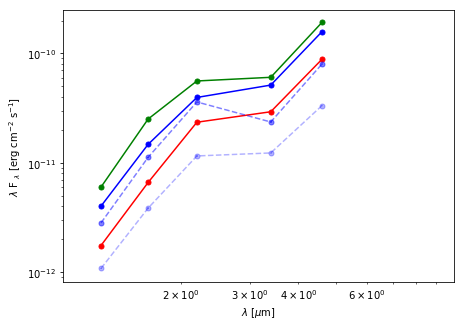

In [59]:
plt.close()
plt.figure(figsize=[7,5])
wvsp = np.array([1.25,1.65,2.2,3.4,4.6])
wvs = wvsp/(cons.c*1e+6)
SED_fluxes_0 = np.array([SED_fluxes_J[0],SED_fluxes_H[0],SED_fluxes_K[0],fluxes_W1[i1]/wvs[3],fluxes_W2[i1]/wvs[4]])
SED_fluxes_1 = np.array([SED_fluxes_J[1],SED_fluxes_H[1],SED_fluxes_K[1],fluxes_W1[i2]/wvs[3],fluxes_W2[i2]/wvs[4]])
SED_fluxes_2 = np.array([SED_fluxes_J[2],SED_fluxes_H[2],SED_fluxes_K[2],fluxes_W1[i3]/wvs[3],fluxes_W2[i3]/wvs[4]])
SED_fluxes_3 = np.array([SED_fluxes_J[3],SED_fluxes_H[3],SED_fluxes_K[3],fluxes_W1[i4]/wvs[3],fluxes_W2[i4]/wvs[4]])
SED_fluxes_4 = np.array([SED_fluxes_J[4],SED_fluxes_H[4],SED_fluxes_K[4],fluxes_W1[i5]/wvs[3],fluxes_W2[i5]/wvs[4]])
SED_noises_0 = np.array([SED_noises_J[0],SED_noises_H[0],SED_noises_K[0],fnoises_W1[i1]/wvs[3],fnoises_W2[i1]/wvs[4]])
SED_noises_1 = np.array([SED_noises_J[1],SED_noises_H[1],SED_noises_K[1],fnoises_W1[i2]/wvs[3],fnoises_W2[i2]/wvs[4]])
SED_noises_2 = np.array([SED_noises_J[2],SED_noises_H[2],SED_noises_K[2],fnoises_W1[i3]/wvs[3],fnoises_W2[i3]/wvs[4]])
SED_noises_3 = np.array([SED_noises_J[3],SED_noises_H[3],SED_noises_K[3],fnoises_W1[i4]/wvs[3],fnoises_W2[i4]/wvs[4]])
SED_noises_4 = np.array([SED_noises_J[4],SED_noises_H[4],SED_noises_K[4],fnoises_W1[i5]/wvs[3],fnoises_W2[i5]/wvs[4]])
plt.errorbar(wvsp,[x*1e-23 for x in SED_fluxes_0],[x*1e-23 for x in SED_noises_0],color="red",
             fmt='o-',alpha=1,markersize=5,label=LCC.JD2date(CustomFunction[0])+", B1")
plt.errorbar(wvsp,[x*1e-23 for x in SED_fluxes_1],[x*1e-23 for x in SED_noises_1],color="blue",
             fmt='o-',alpha=0.3,markersize=5,label=LCC.JD2date(CustomFunction[1])+", P1",linestyle='dashed')
plt.errorbar(wvsp,[x*1e-23 for x in SED_fluxes_2],[x*1e-23 for x in SED_noises_2],color="blue",
             fmt='o-',alpha=0.5,markersize=5,label=LCC.JD2date(CustomFunction[2])+", P2",linestyle='dashed')
plt.errorbar(wvsp,[x*1e-23 for x in SED_fluxes_3],[x*1e-23 for x in SED_noises_2],color="blue",
             fmt='o-',alpha=1,markersize=5,label=LCC.JD2date(CustomFunction[3])+", B2")
#plt.errorbar(wvsp,[x*1e-23 for x in SED_fluxes_2],[x*1e-23 for x in SED_noises_2],color="red",
#             fmt='o-',alpha=0.5,markersize=5,label=LCC.JD2date(CustomFunction[2]),linestyle='dashed')
plt.errorbar(wvsp,[x*1e-23 for x in SED_fluxes_4],[x*1e-23 for x in SED_noises_2],color="green",
             fmt='o-',alpha=1,markersize=5,label=LCC.JD2date(CustomFunction[4])+", B3")
plt.xscale("log")
plt.yscale("log")
plt.xlim([1,10])
plt.ylabel("$\lambda$ F $_{\lambda}$ [erg cm$^{-2}$ s$^{-1}$]")
plt.xlabel("$\lambda$ [$\mu$m]")
#plt.xticks([1,wvsp[0],wvsp[1],wvsp[2],wvsp[3],wvsp[4],10],[1,wvsp[0],wvsp[1],wvsp[2],wvsp[3],wvsp[4],10])
#import matplotlib.ticker as mtick
#plt.gca().axes.get_xaxis.set_visible(False)
#plt.gca().tick_params(axis='x', labelbottom='off')



#plt.xticks([1,2,3,4,6,10])
plt.legend(loc='upper right')


plt.savefig("/mnt/Secdrive/TSmain/SERPM/Results_190709/EC53/SERPM_EC53_SED_3b1ph.pdf")


In [213]:
2.898e-3/2.2e-6
importlib.reload(LCP)

<module 'LCPlot' from '/mnt/Secdrive/TSmain/Pip_test/trigger_codes_github/LCPlot.py'>

20180525
82.55330700008199
12.157


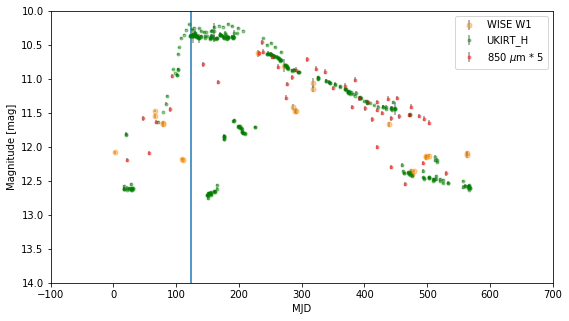

In [9]:
##############################Overlaped Phase diagram #######################
alpha=0.4
period = 570
plt.close()
plt.figure(figsize=[9,5])
region = "SERPM"
#LCP.LCplot([x%period for x in JDs_850], [x*5+12 for x in mags_850],noises_850,mod_date,region,k,wl='ALL_bands',mag=1,save=0,
#           newplot=0, color='red',ecolor = 'black',stringcolor='green',figureindex=1,
#           markersize =3,capsize=0,alpha = alpha,label = "850 $\mu$m * 5")
#LCP.LCplot([x%period for x in JDs_W4], [x for x in mags_W4],noises_W4,mod_date,region,k,wl='ALL_bands',mag=1,save=0,
#           newplot=0, color='brown',ecolor = 'black',stringcolor='green',figureindex=1,
#           markersize =3,capsize=1,alpha = alpha)
#LCP.LCplot([x%period for x in JDs_W3], [x for x in mags_W3],noises_W3,mod_date,region,k,wl='ALL_bands',mag=1,save=0,
#           newplot=0, color='orangered',ecolor = 'black',stringcolor='green',figureindex=1,
#           markersize =3,capsize=1,alpha = alpha)
#LCP.LCplot([x%period for x in JDs_W2], [x for x in mags_W2],noises_W2,mod_date,region,k,wl='ALL_bands',mag=1,save=0,
#           newplot=0, color='blue',ecolor = 'black',stringcolor='green',figureindex=1,
#           markersize =3,capsize=0,alpha = alpha,label = "WISE_W2")
LCP.LCplot([x%period for x in JDs_W1], [x+1.5 for x in mags_W1],noises_W1,mod_date,region,k,wl='ALL_bands',mag=1,save=0,
           newplot=0, color='darkorange',ecolor = 'black',stringcolor='green',figureindex=1,
           markersize =5,capsize=0,alpha = alpha,label = "WISE W1")
#LCP.LCplot([x%period for x in JDs_J], [x-4 for x in mags_J],noises_J,mod_date,region,k,wl='ALL_bands',mag=1,save=0,
#           newplot=0, color='darkslategray',ecolor = 'black',stringcolor='green',figureindex=1,
#           markersize =3,capsize=1,alpha = alpha,label="UKIRT_J")
LCP.LCplot([x%period for x in JDs_H], [x-1.8 for x in mags_H],noises_H,mod_date,region,k,wl='ALL_bands',mag=1,save=0,
           newplot=0, color='green',ecolor = 'black',stringcolor='green',figureindex=1,
           markersize =3,capsize=0,alpha = alpha,label = "UKIRT_H")
#LCP.LCplot([x%period for x in JDs_K], [x for x in mags_K],noises_K,mod_date,region,k,wl='ALL_bands',mag=1,save=0,
#           newplot=0, color='yellowgreen',ecolor = 'black',stringcolor='green',figureindex=1,
#           markersize =3,capsize=1,alpha = alpha,label = "UKIRT K")
LCP.LCplot([x%period for x in JDs_850], [x*5+12 for x in mags_850],noises_850,mod_date,region,k,wl='ALL_bands',mag=1,save=0,
           newplot=0, color='red',ecolor = 'black',stringcolor='green',figureindex=1,
           markersize =3,capsize=0,alpha = alpha,label = "850 $\mu$m * 5")
plt.xlim([-100,700])
plt.ylim([3,18])
plt.ylim([10,14])
plt.plot([55000+2508,55000+2508],[0,20],color = "black",alpha =0.3)
plt.plot([55000+3051,55000+3051],[0,20],color = "black", alpha = 0.3)
LCP.LCplot(JDs_HK, [x for x in mags_HK],noises_HK,mod_date,region,k,wl='IR_bands',mag=1,save=0,
           newplot=0, color='grey',ecolor = 'grey',stringcolor='green',figureindex=1,
           markersize =3,capsize=1,alpha = 0.5,legend = 2,option=str(period)+"PD")

i = 175
plt.plot([[x%period for x in JDs_H][i],[x%period for x in JDs_H][i]],[10,14])
print(LCC.JD2date(JDs_H[i]))
print(JDs_H[260]-JDs_H[175])
print(mags_H[i])

In [ ]:
LCP.LCplot(JDs_J, [x for x in mags_J],noises_J,mod_date,region,k,wl='ALL_bands',mag=1,save=0,
           newplot=0, color='darkslategray',ecolor = 'black',stringcolor='green',figureindex=1,
           markersize =3,capsize=1,alpha = alpha,label="J (1.25 $\mu$m)",legend=1)
print()